In [9]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from env import get_db_url
import acquire
import prepare

alpha = .05

## Acquire 

In [ ]:
def get_telco_data():

    '''This function pulls telco data from the Codeup database and saves
    the file as a .csv'''
    filename = 'telco_data.csv'

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
       sql_query = '''SELECT * from customers
                JOIN contract_types using (contract_type_id)
                JOIN internet_service_types using (internet_service_type_id)
                JOIN payment_types using (payment_type_id)'''
       
    
    df = pd.read_sql(sql_query, get_db_url('telco_churn'))

    df.to_csv(filename)

    return df

In [11]:
df = acquire.get_telco_data()
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Prepare 

In [28]:
# replace empty cells with nulls
df = df.replace(' ', np.nan)

In [29]:
# check df for nulls
df.isna().sum()

Unnamed: 0                   0
payment_type_id              0
internet_service_type_id     0
contract_type_id             0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64

In [34]:
# drop 11 nulls from total_charges
df.dropna(inplace=True)

In [35]:
# check df for nulls
df.isna().sum()

Unnamed: 0                  0
payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7032 non-null   int64  
 1   payment_type_id           7032 non-null   int64  
 2   internet_service_type_id  7032 non-null   int64  
 3   contract_type_id          7032 non-null   int64  
 4   customer_id               7032 non-null   object 
 5   gender                    7032 non-null   object 
 6   senior_citizen            7032 non-null   int64  
 7   partner                   7032 non-null   object 
 8   dependents                7032 non-null   object 
 9   tenure                    7032 non-null   int64  
 10  phone_service             7032 non-null   object 
 11  multiple_lines            7032 non-null   object 
 12  online_security           7032 non-null   object 
 13  online_backup             7032 non-null   object 
 14  device_p

In [37]:
# change total_charges to float
df['total_charges'] = pd.to_numeric(df['total_charges'])

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7032.0,3522.306314,2034.073173,0.00,1759.7500,3524.500,5283.2500,7042.00
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [44]:
# determine columns to drop
# Unnamed: 0 (note needed)	payment_type_id	internet_service_type_id	contract_type_id (already in additional columns)
df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])

KeyError: "['Unnamed: 0' 'payment_type_id' 'internet_service_type_id'\n 'contract_type_id'] not found in axis"

In [56]:
# convert categorical columns to boolean
df['is_female'] = df['gender'].map({'Female': 1, 'Male': 0})
df['has_partner'] = df['partner'].map({'Yes': 1, 'No': 0})
df['has_dependents'] = df['dependents'].map({'Yes': 1, 'No': 0})
df['has_phone_service'] = df['phone_service'].map({'Yes': 1, 'No': 0})
df['has_paperless_billing'] = df['paperless_billing'].map({'Yes': 1, 'No': 0})
df['has_churned'] = df['churn'].map({'Yes': 1, 'No': 0})
df['has_multiple_lines'] = df['multiple_lines'].map({'Yes': 1, 'No': 0})
df['has_online_security'] = df['online_security'].map({'Yes': 1, 'No': 0})
df['has_online_backup'] = df['online_backup'].map({'Yes': 1, 'No': 0})
df['has_tech_support'] = df['tech_support'].map({'Yes': 1, 'No': 0})
df['has_streaming_tv'] = df['streaming_tv'].map({'Yes': 1, 'No': 0})
df['has_streaming_movies'] = df['streaming_movies'].map({'Yes': 1, 'No': 0})
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [54]:
dummy_df = pd.get_dummies(df[['contract_type','internet_service_type', 'payment_type']],dummy_na=False, drop_first=False)

In [55]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
is_female,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
has_partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
has_dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
has_phone_service,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
has_paperless_billing,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
has_churned,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [63]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)


In [66]:
train.shape, validate.shape, test.shape

((3937, 50), (1688, 50), (1407, 50))

In [69]:
# confirm data was stratified
train.churn.value_counts(normalize=True), validate.churn.value_counts(normalize=True), test.churn.value_counts(normalize=True)

(No     0.734315
 Yes    0.265685
 Name: churn, dtype: float64,
 No     0.734005
 Yes    0.265995
 Name: churn, dtype: float64,
 No     0.734186
 Yes    0.265814
 Name: churn, dtype: float64)

In [71]:
def clean_telco_data(df):
    # replace empty cells with nulls
    df = df.replace(' ', np.nan)
    # drop 11 nulls from total_charges
    df.dropna(inplace=True)
    # change total_charges to float
    df['total_charges'] = pd.to_numeric(df['total_charges'])
    # drop unnecessary columns
    df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    # convert categorical columns to boolean
    df['is_female'] = df['gender'].map({'Female': 1, 'Male': 0})
    df['has_partner'] = df['partner'].map({'Yes': 1, 'No': 0})
    df['has_dependents'] = df['dependents'].map({'Yes': 1, 'No': 0})
    df['has_phone_service'] = df['phone_service'].map({'Yes': 1, 'No': 0})
    df['has_paperless_billing'] = df['paperless_billing'].map({'Yes': 1, 'No': 0})
    df['has_churned'] = df['churn'].map({'Yes': 1, 'No': 0})
    df['has_multiple_lines'] = df['multiple_lines'].map({'Yes': 1, 'No': 0})
    df['has_online_security'] = df['online_security'].map({'Yes': 1, 'No': 0})
    df['has_online_backup'] = df['online_backup'].map({'Yes': 1, 'No': 0})
    df['has_tech_support'] = df['tech_support'].map({'Yes': 1, 'No': 0})
    df['has_streaming_tv'] = df['streaming_tv'].map({'Yes': 1, 'No': 0})
    df['has_streaming_movies'] = df['streaming_movies'].map({'Yes': 1, 'No': 0})
    # encoce categorical columns 
    dummy_df = pd.get_dummies(df[['contract_type','internet_service_type', 'payment_type']],dummy_na=False, drop_first=False)
    #combine dataframes
    df = pd.concat([df, dummy_df], axis=1)
    
    return df
    


In [72]:
def prep_telco_data(df):
    df = clean_titanic_data(df)
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    
    return train, validate, test
    

## Explore

### Takeaways
    

In [74]:
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

<AxesSubplot:>

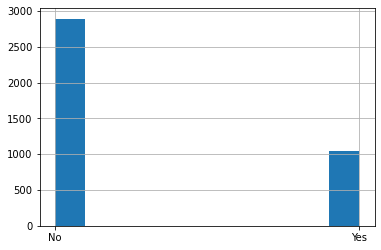

In [73]:
train.churn.hist()

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

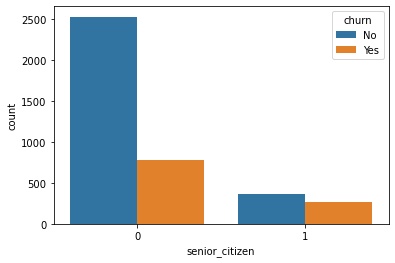

In [79]:
sns.countplot(data=train, x='senior_citizen', hue ='churn')

<AxesSubplot:xlabel='dependents', ylabel='count'>

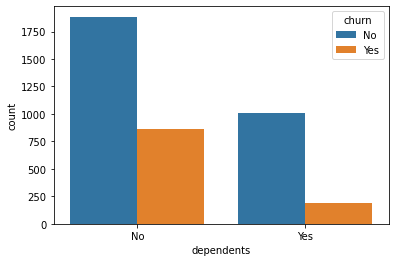

In [80]:
sns.countplot(data=train, x='dependents', hue ='churn')

<AxesSubplot:xlabel='partner', ylabel='count'>

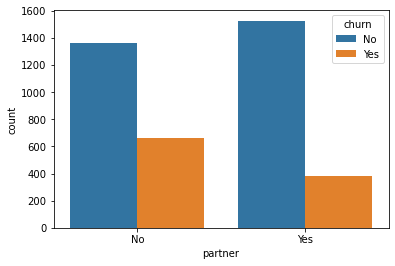

In [81]:
sns.countplot(data=train, x='partner', hue ='churn')

<AxesSubplot:xlabel='churn', ylabel='count'>

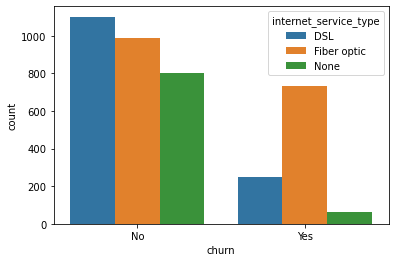

In [82]:
sns.countplot(data=train, x='churn', hue ='internet_service_type')

<AxesSubplot:xlabel='churn', ylabel='count'>

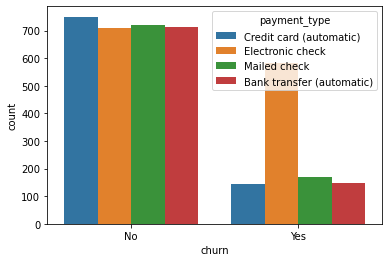

In [83]:
sns.countplot(data=train, x='churn', hue ='payment_type')

<AxesSubplot:xlabel='churn', ylabel='count'>

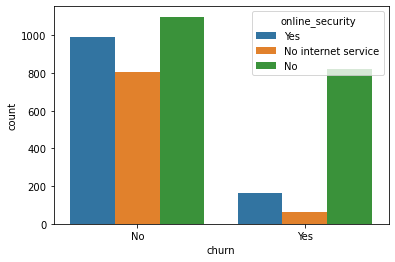

In [84]:
# explore add-on services
sns.countplot(data=train, x='churn', hue ='online_security')

<AxesSubplot:xlabel='churn', ylabel='count'>

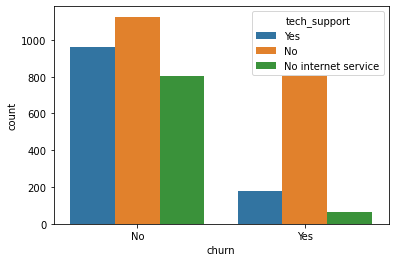

In [85]:
sns.countplot(data=train, x='churn', hue ='tech_support')

<AxesSubplot:xlabel='churn', ylabel='count'>

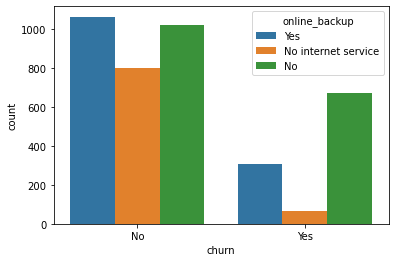

In [86]:
sns.countplot(data=train, x='churn', hue ='online_backup')

<AxesSubplot:xlabel='churn', ylabel='count'>

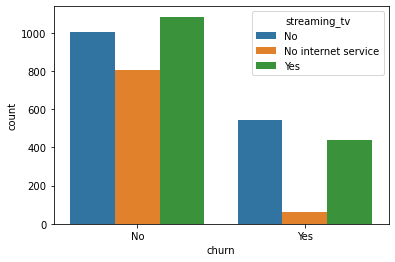

In [87]:
sns.countplot(data=train, x='churn', hue ='streaming_tv')

<AxesSubplot:xlabel='churn', ylabel='count'>

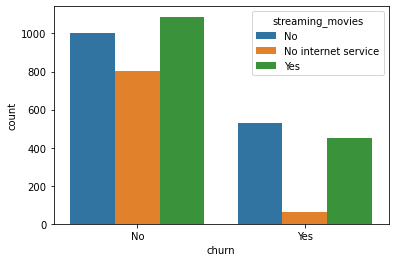

In [88]:
sns.countplot(data=train, x='churn', hue ='streaming_movies')

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

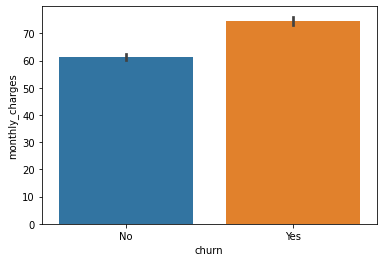

In [90]:
sns.barplot(data=train, y='monthly_charges', x='churn')

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

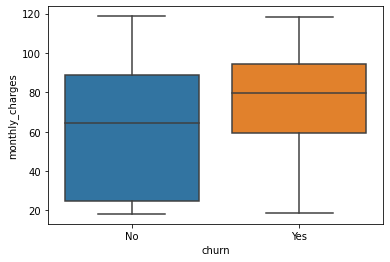

In [92]:
sns.boxplot(data=train,  y='monthly_charges', x='churn')